## Module 4

This week we will be looking at Enterococcus levels in the Hudson River, using data from the
organization Riverkeeper ( http://www.riverkeeper.org/).

Background: Enterococcus is a fecal indicating bacteria that lives in the intestines of humans
and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water
quality indicator due to their abundance in human sewage, correlation with many human
pathogens and low abundance in sewage free environments. The United States
Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100
ml of water.

Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal
Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an
illness rate of 32 per 1000 swimmers.

The federal standard for unacceptable water quality is a single sample value of greater than
110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted
average) greater than 30 Enterococcus/100 mL.

Data: I have provided the data on our github page, in the folder
https://github.com/charleyferrari/CUNY_DATA608/tree/master/lecture4/Data. I have not
cleaned it – you need to do so.

This assignment must be done in python. It must be done using the ‘bokeh’, 'seaborn', or
'pandas' package. You may turn in either a . py file or an ipython notebook file.

Questions:
- Create lists & graphs of the best and worst places to swim in the dataset.
- The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested.
- Is there a relationship between the amount of rain and water quality? Show this
relationship graphically. If you can, estimate the effect of rain on quality at different sites and
create a visualization to compare them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print (__version__)
init_notebook_mode(connected=True)

import cufflinks as cf

import seaborn as sns


2.0.11


In [2]:
from ipywidgets import interact

In [3]:
hudson = pd.read_csv("https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv")

In [4]:
hudson.head(20)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35
5,Hudson above Mohawk River,6/4/2013,238,1.2,35
6,Hudson above Mohawk River,10/15/2012,23,1.4,35
7,Hudson above Mohawk River,9/15/2012,11,0.1,35
8,Hudson above Mohawk River,8/18/2012,15,0.3,35
9,Hudson above Mohawk River,7/21/2012,6,0.2,35


In [5]:
hudson.describe(include = 'all')

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
count,3397,3397,3397,3397.000000,3397.000000
unique,75,424,425,NaN,NaN
top,Piermont Pier,5/19/2011,<10,NaN,NaN
freq,187,27,528,NaN,NaN
mean,NaN,NaN,NaN,0.568001,56.886370
std,NaN,NaN,NaN,1.000387,41.588476
min,NaN,NaN,NaN,0.000000,27.000000
25%,NaN,NaN,NaN,0.000000,37.000000
50%,NaN,NaN,NaN,0.200000,42.000000
75%,NaN,NaN,NaN,0.700000,50.000000


In [6]:
hudson = hudson.dropna(axis=0)

In [7]:
hudson['Date'] = pd.to_datetime(hudson['Date'])

In [8]:
import string 
hudson['stange']=hudson['EnteroCount'].str.contains('[{}]'.format(string.punctuation)).astype(int)

In [9]:
stange=hudson.loc[hudson['stange']==1,]
stange['EnteroCount'].unique()

array(['>2420', '<1', '<10', '>24196'], dtype=object)

In [10]:
hudson['EnteroCount']=hudson['EnteroCount'].str.replace('[{}]'.format(string.punctuation), '')

In [11]:
hudson['EnteroCount']=pd.to_numeric(hudson['EnteroCount'])

### 1. Create lists & graphs of the best and worst places to swim in the dataset.

Check whehter there are sites have less than 5 samples

In [12]:
c = hudson.groupby(['Site'])['Site'].count()
c=c.to_frame()
c.columns=['samples']
c[c.samples < 5].index.values

array([], dtype=object)

All sites have more than 5 samples. Go ahead to calculate geometric mean of enteroccocus count. 

In [13]:
from scipy.stats.mstats import gmean

In [14]:
hudson['geomean']=hudson.groupby('Site').EnteroCount.apply(gmean,axis=0)
hudson['geomean'].unique()

array([ nan])

Geometric mean returned null so there must be 0 or null in the dataset.
Then I will check if there is missing data or o in EnteroCount

In [15]:
hudson['EnteroCount'].isnull().values.any()

False

In [16]:
any(n == 0 for n in hudson['EnteroCount'])

True

In [17]:
hudson.loc[hudson['EnteroCount']==0,'EnteroCount']

522    0
Name: EnteroCount, dtype: int64

There is only one 0 record. So I remove row 522 in order to calculate geometric mean for EnteroCount. 


In [18]:
hudson.drop(hudson.index[[522]],inplace=True)

In [19]:
any(n == 0 for n in hudson['EnteroCount'])

False

In [20]:
hudson['EnteroCount'].isnull().values.any()

False

In [21]:
a=hudson.groupby(['Site'])['EnteroCount'].apply(gmean,axis=0)
a.to_dict() 
hudson['geomean'] = hudson['Site'].map(a)

**Find the sites where a single sample value of greater than 110 Enterococcus/100 mL**

In [22]:
single = hudson.loc[hudson.EnteroCount >=110,'Site'].unique()
len(single)
single

array(['Hudson above Mohawk River', 'Mohawk River at Waterford',
       'Hudson River above Troy Lock', 'Congress St. Bridge- Troy',
       'Albany Rowing Dock', 'Dunn Memorial Bridge- Albany',
       'Island Creek/Normans Kill', 'Bethlehem Launch Ramp', 'Castleton',
       'Coeymans Landing', 'Coxsackie Waterfront Park',
       "Gay's Point mid-channel", 'Athens', 'Hudson Landing Ramp',
       'Catskill Creek- First Bridge', 'Catskill Launch Ramp',
       'Catskill Creek- East End', 'Inbocht Bay', 'Malden Launch Ramp',
       'Esopus Creek West', 'Esopus Creek Entrance', 'Tivoli Landing',
       'Ulster Landing Beach', 'Kingston Point Beach',
       'Kingston STP Outfall', 'Rondout- Kingston Public Dock',
       'Rondout- Eddyville Anchorage', 'Port Ewen Drinking Water Intake',
       'Norrie Point Yacht Basin', 'Norrie Point mid-channel',
       'Marlboro Landing', 'Wappingers Creek', 'Beacon Harbor',
       'Newburgh Launch Ramp', 'Little Stony Point', 'Cold Spring Harbor',
       '

**Find the sites where five or more samples with a geometric mean (a weighted average) greater than 30 Enterococcus/100 mL.**

In [23]:
many =  hudson.loc[hudson.geomean >=30,'Site'].unique()
len(many)
many

array(['Mohawk River at Waterford', 'Hudson River above Troy Lock',
       'Congress St. Bridge- Troy', 'Albany Rowing Dock',
       'Dunn Memorial Bridge- Albany', 'Island Creek/Normans Kill',
       'Athens', 'Kingston STP Outfall', 'Rondout- Kingston Public Dock',
       'Rondout- Eddyville Anchorage', 'Newburgh Launch Ramp',
       'Kingsland Pt. Park- Pocantico River', 'Nyack Launch Ramp',
       'Tarrytown Marina', 'Piermont Pier', 'Orangetown STP Outfall',
       'Upper Sparkill Creek', 'Saw Mill River',
       'Harlem River- Washington Bridge', 'North River STP at 145th',
       '125th St. Pier', 'Harlem River- Willis Ave. Bridge',
       'Newtown Creek- Dutch Kills',
       'Newtown Creek- Metropolitan Ave. Bridge', 'Gowanus Canal'], dtype=object)

In [24]:
len(hudson.Site.unique())

75

**So we know that 98% of the sites have unacceptable water quality for swimming.**

In [25]:
hudson['swim'] = np.where(((hudson['Site'].isin(single)) |(hudson['Site'].isin(many))), 'unacceptable', 'acceptable')


In [26]:
hudson['swim_num']=np.where((hudson['swim']=='acceptable'),1,-1)

In [27]:
hudson['ecount'] = hudson['swim_num']*hudson['EnteroCount']
q1 = hudson.loc[:,('Site','geomean','swim','swim_num')]
q1 = q1.drop_duplicates()

**Plot the site with either good or bad water qualities in bar chart.**

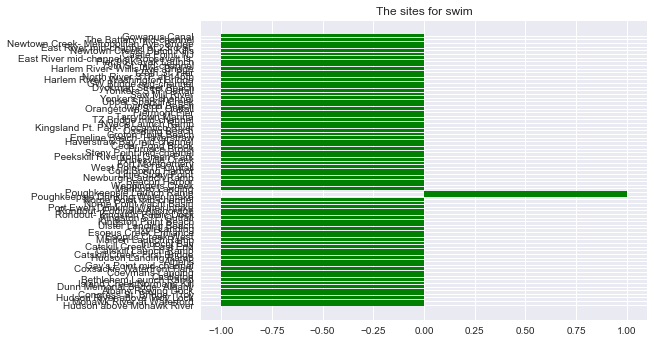

In [28]:
y = q1['swim_num'] 
x = q1['Site']
x_pos = [i for i, _ in enumerate(x)] 
plt.barh(x_pos, y, color='green')
plt.yticks(x_pos, x)
plt.title('The sites for swim')
 
plt.show()

There are too many sites so the name could not be seen clearly. font size should be adjusted.

In [29]:
import plotly.plotly as py
import cufflinks as cf

cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


**Find the sites with the highest geomean in unacceptable group and lowest geomean in accetable group**

In [30]:
high = q1.loc[q1.swim == 'unacceptable','geomean'].max()
low = q1.loc[q1.swim == 'acceptable','geomean'].min()

In [31]:
q1.loc[q1.geomean == low,'swim']='acceptable/best'
q1.loc[q1.geomean == high,'swim']='unacceptable/worst'

In [32]:
q1.loc[q1.geomean == high,'swim']

2360    unacceptable/worst
Name: swim, dtype: object

**Plot the geomean vs sites in bubble chart.**

In [33]:
q1.iplot(kind='bubble', x='Site', y='geomean', size='geomean', text='Site',categories='swim',
             xTitle='hudson river site', yTitle='Enteroccocus Count',
             filename='cufflinks/q1-bubble-chart',logy=True)

**Conclusion:**
    
    There are two sites in Hudson river where the water quality is acceptable for swimming: Poughkeepsie Drinking Water Intake and Poughkeepsie Launch Ramp and the former is the best site which has very low Enteroccocus count. About 98% of the sites along Hudson river is not appropreate for swimming and the worst site is Upper Sparkill Creek.

#### 2: The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.

change the formate of date and time

In [34]:
hudson['Date'] = pd.to_datetime(hudson['Date'])

In [35]:
demin = lambda df: df - df.min()
gap = hudson.groupby(['Site'])['Date'].transform(demin)
hudson['gap'] = gap
hudson['gap_num'] = hudson['gap'] / np.timedelta64(1, 'D') # extract the integer value of days by divide it with a timedelta of one day

In [36]:
hudson.head(3)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,stange,geomean,swim,swim_num,ecount,gap,gap_num
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35,0,23.986918,unacceptable,-1,-1733,1242 days,1242.0
1,Hudson above Mohawk River,2013-10-21,4,0.2,35,0,23.986918,unacceptable,-1,-4,1978 days,1978.0
2,Hudson above Mohawk River,2013-09-21,20,0.0,35,0,23.986918,unacceptable,-1,-20,1948 days,1948.0


In [37]:
hudson.sort_values(['Site','gap_num'],ascending=True)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,stange,geomean,swim,swim_num,ecount,gap,gap_num
2923,125th St. Pier,2006-10-02,1433,0.5,66,0,54.033034,unacceptable,-1,-1433,0 days,0.0
2919,125th St. Pier,2006-10-03,773,0.4,66,0,54.033034,unacceptable,-1,-773,1 days,1.0
2917,125th St. Pier,2006-10-06,824,0.7,66,0,54.033034,unacceptable,-1,-824,4 days,4.0
2916,125th St. Pier,2006-10-11,269,0.4,66,0,54.033034,unacceptable,-1,-269,9 days,9.0
2915,125th St. Pier,2006-10-12,305,1.9,66,0,54.033034,unacceptable,-1,-305,10 days,10.0
2914,125th St. Pier,2006-10-31,147,2.2,66,0,54.033034,unacceptable,-1,-147,29 days,29.0
2913,125th St. Pier,2007-05-29,83,0.0,66,0,54.033034,unacceptable,-1,-83,239 days,239.0
2912,125th St. Pier,2007-05-30,21,0.0,66,0,54.033034,unacceptable,-1,-21,240 days,240.0
2911,125th St. Pier,2007-05-31,8,0.0,66,0,54.033034,unacceptable,-1,-8,241 days,241.0
2909,125th St. Pier,2007-06-01,12,0.0,66,0,54.033034,unacceptable,-1,-12,242 days,242.0


In [39]:
grp = hudson.sort_values(['Site','gap_num'],ascending=True).groupby(['Site'])
g = grp.apply(lambda g: g['gap_num'].diff().replace(np.nan,0))
tm = pd.DataFrame(g)
tm=tm.reset_index()
tm.set_index('level_1',inplace=True)


In [46]:
hudson['day_diff']=tm.gap_num
hudson.head(3)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,stange,geomean,swim,swim_num,ecount,gap,gap_num,day_diff
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35,0,23.986918,unacceptable,-1,-1733,1242 days,1242.0,27.0
1,Hudson above Mohawk River,2013-10-21,4,0.2,35,0,23.986918,unacceptable,-1,-4,1978 days,1978.0,30.0
2,Hudson above Mohawk River,2013-09-21,20,0.0,35,0,23.986918,unacceptable,-1,-20,1948 days,1948.0,33.0


**View the distribution of gap between tests for each site**

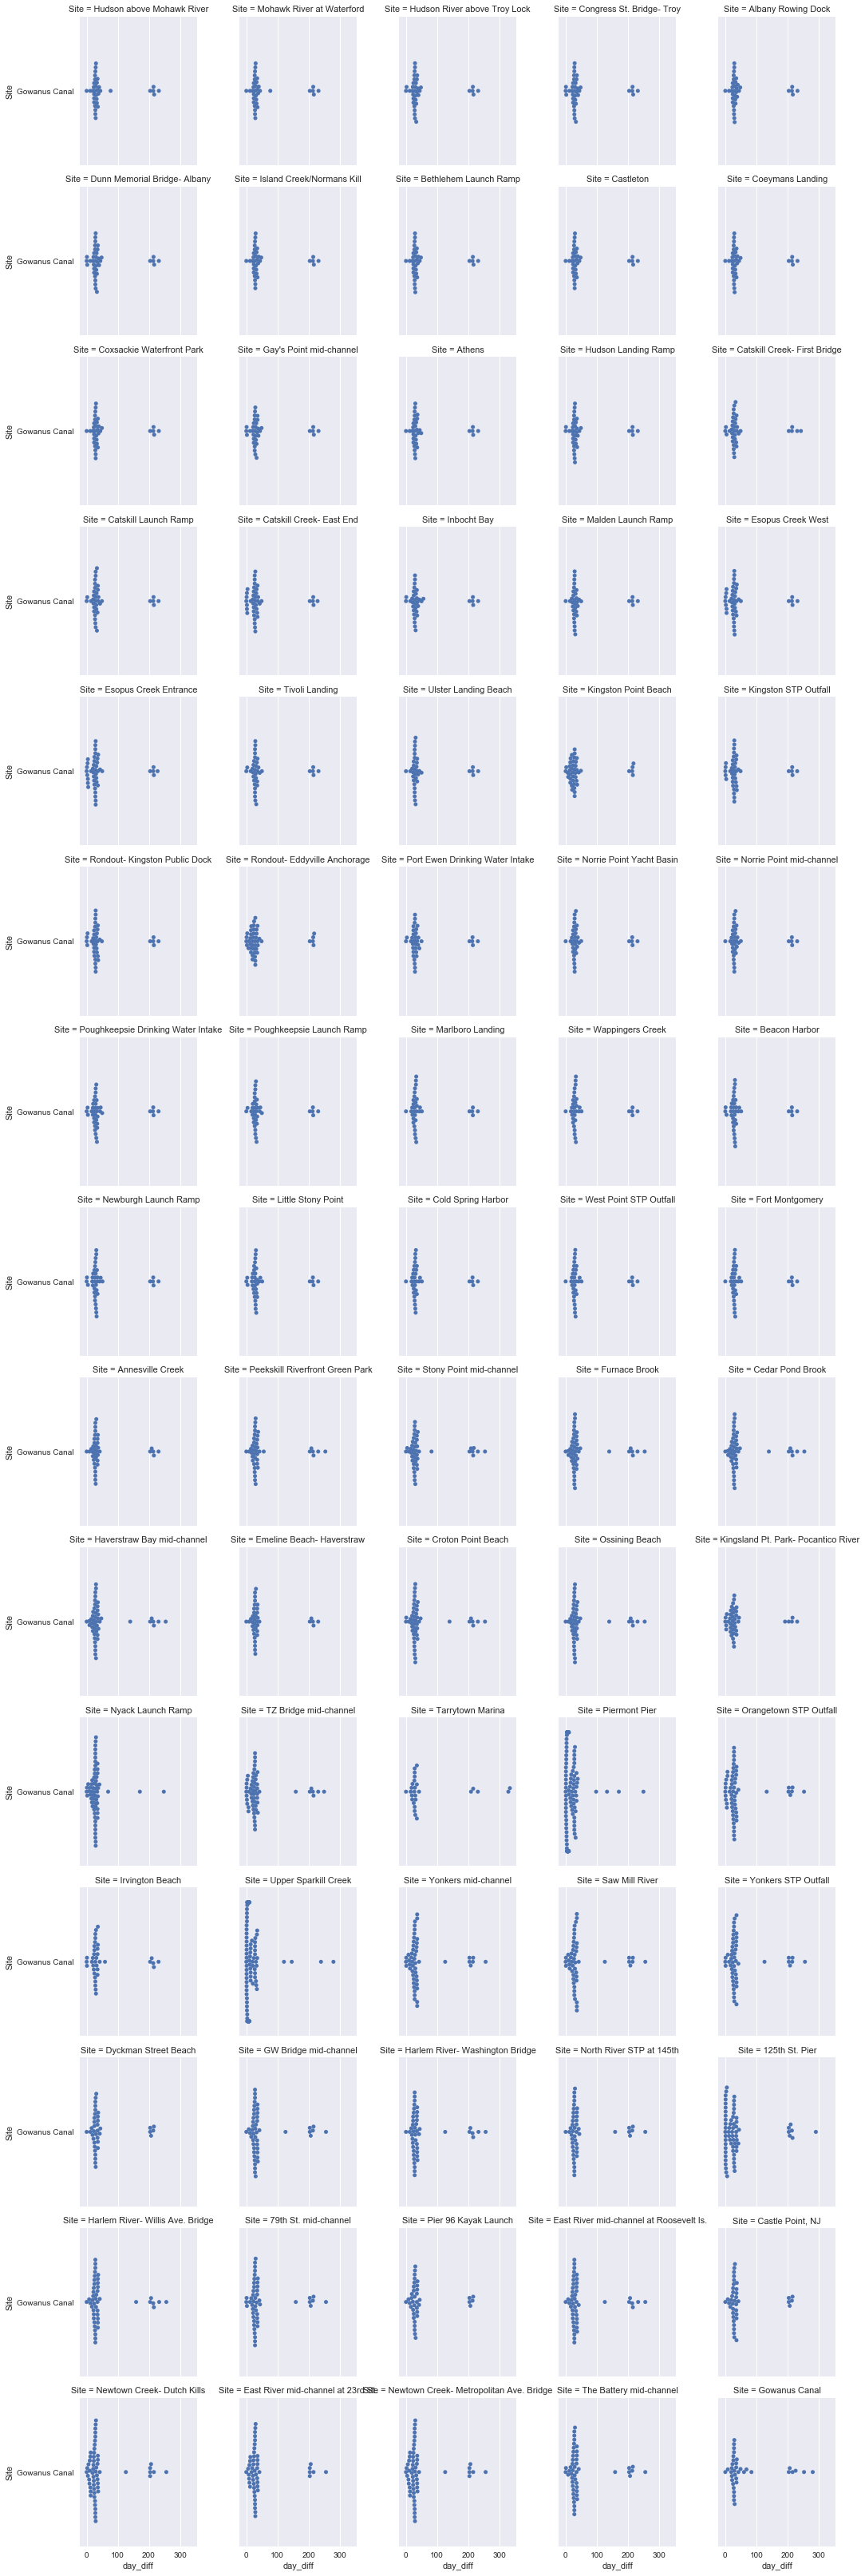

In [47]:
g = sns.FacetGrid(hudson, col="Site", col_wrap=5, size=3)
g = g.map(sns.swarmplot,"day_diff", "Site", data=hudson)

**Find the average gap between tests **

In [48]:
hudson['ave_diff'] = hudson.groupby(['Site'])['day_diff'].transform(np.mean)
hudson.head(3)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,stange,geomean,swim,swim_num,ecount,gap,gap_num,day_diff,ave_diff
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35,0,23.986918,unacceptable,-1,-1733,1242 days,1242.0,27.0,56.514286
1,Hudson above Mohawk River,2013-10-21,4,0.2,35,0,23.986918,unacceptable,-1,-4,1978 days,1978.0,30.0,56.514286
2,Hudson above Mohawk River,2013-09-21,20,0.0,35,0,23.986918,unacceptable,-1,-20,1948 days,1948.0,33.0,56.514286


In [49]:
test_freq = hudson.loc[:,['Site','swim','ave_diff']].drop_duplicates()
test_freq

,Site,swim,ave_diff
0,Hudson above Mohawk River,unacceptable,56.514286
35,Mohawk River at Waterford,unacceptable,56.514286
70,Hudson River above Troy Lock,unacceptable,53.459459
107,Congress St. Bridge- Troy,unacceptable,52.052632
145,Albany Rowing Dock,unacceptable,54.944444
181,Dunn Memorial Bridge- Albany,unacceptable,52.052632
219,Island Creek/Normans Kill,unacceptable,55.714286
254,Bethlehem Launch Ramp,unacceptable,54.944444
290,Castleton,unacceptable,55.714286
325,Coeymans Landing,unacceptable,54.944444


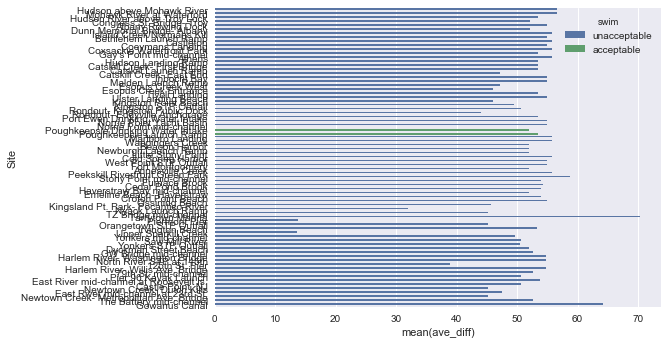

In [50]:
sns.barplot(x="ave_diff", y="Site", hue="swim", data=test_freq)


In [52]:
test_freq.iplot(kind='bar', x="ave_diff", y="Site", orientation = 'h',text='Site',
             xTitle='Test Time Gap',
             filename='cufflinks/q2-bar-chart')

**Conlusion-1: Upper Sparkill Creek and Piermont Pier have been tested most regularly. Gowanus Canal and Tarryto Marina have long gaps between tests. Then Pick out 5-10 sites and visually compare how regularly their water quality is tested.**

In [54]:
timesub = hudson.loc[(hudson.Site == 'Poughkeepsie Drinking Water Intake')| 
                    (hudson.Site == 'Poughkeepsie Launch Ramp')| 
                    (hudson.Site == 'Pier 96 Kayak Launch')|
                    (hudson.Site == 'East River mid-channel at Roosevelt Is.')|
                    (hudson.Site == 'The Battery mid-channel')|
                    (hudson.Site == 'Tarrytown Marina')|
                    (hudson.Site == 'Upper Sparkill Creek')|
                    (hudson.Site == 'West Point STP Outfall')|
                    (hudson.Site == 'Cold Spring Harbor')]
timesub.Site.unique()

array(['Poughkeepsie Drinking Water Intake', 'Poughkeepsie Launch Ramp',
       'Cold Spring Harbor', 'West Point STP Outfall', 'Tarrytown Marina',
       'Upper Sparkill Creek', 'Pier 96 Kayak Launch',
       'East River mid-channel at Roosevelt Is.', 'The Battery mid-channel'], dtype=object)

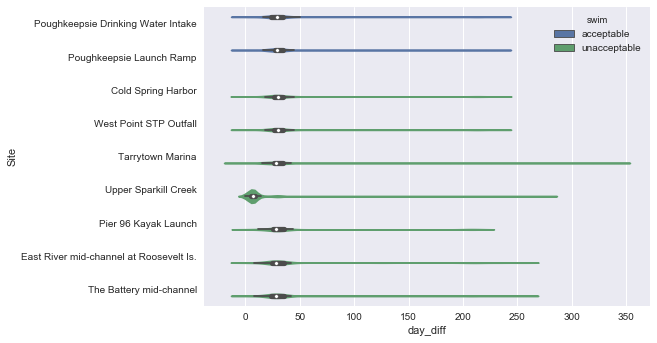

In [56]:
sns.violinplot(x="day_diff", y="Site", hue="swim", data=timesub,
               bw=.1, scale="count", scale_hue=False)

**Conclusion-2: The two best swim sites, the worst swim site and some other sites were chosen to compare the gap between tests. There is no difference on the frequency of test between different sites.**

#### 3. Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

In [57]:
sns.set(style="ticks", color_codes=True)

In [58]:
rain = hudson.loc[:,['Site','EnteroCount','FourDayRainTotal']]

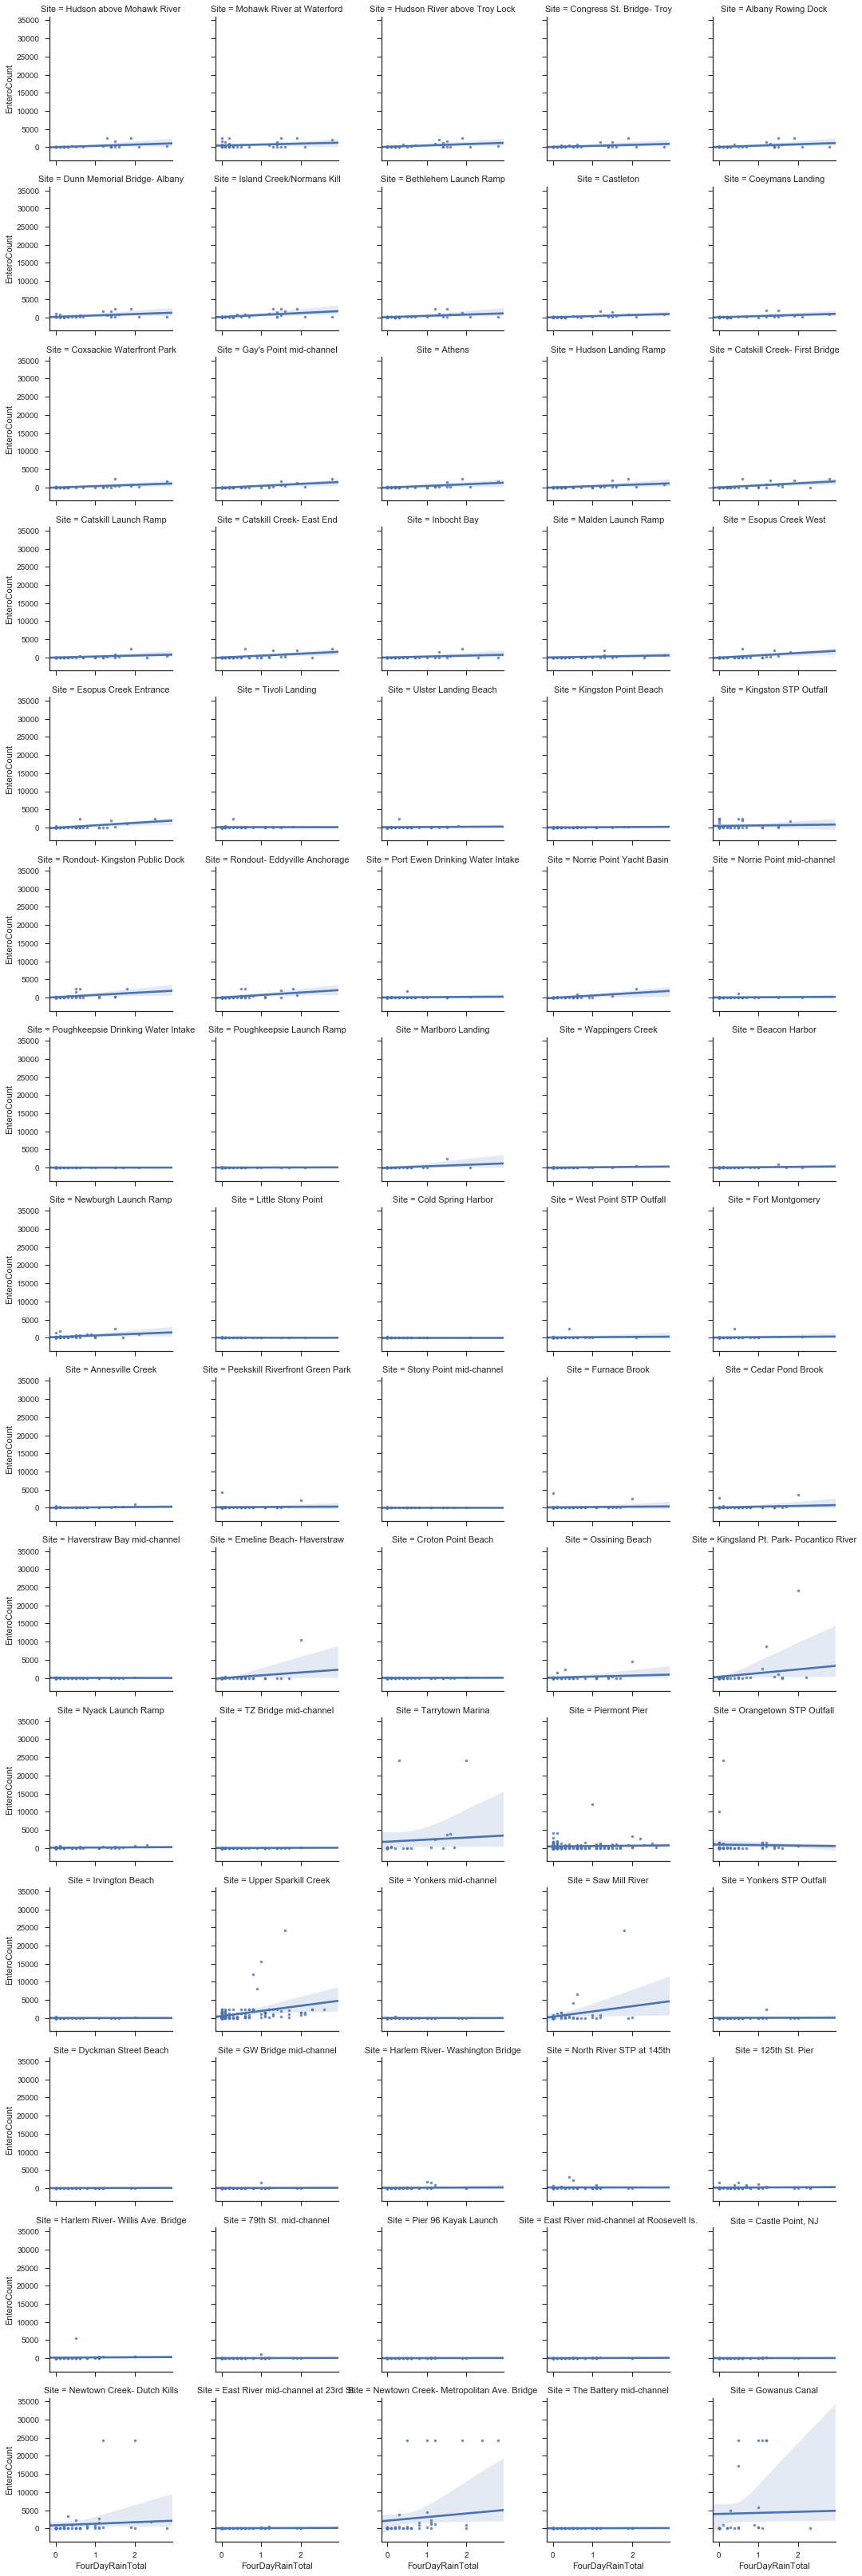

In [59]:
g = sns.FacetGrid(rain, col="Site", col_wrap=5, size=3)
g = g.map(sns.regplot, "FourDayRainTotal", "EnteroCount", marker=".")

In [60]:
rainsub = rain.loc[(rain.Site == 'Poughkeepsie Drinking Water Intake')| 
                    (rain.Site == 'Poughkeepsie Launch Ramp')| 
                    (rain.Site == 'Pier 96 Kayak Launch')|
                    (rain.Site == 'East River mid-channel at Roosevelt Is.')|
                    (rain.Site == 'The Battery mid-channel')|
                    (rain.Site == 'Tarrytown Marina')|
                    (rain.Site == 'Upper Sparkill Creek')|
                    (rain.Site == 'West Point STP Outfall')|
                    (rain.Site == 'Cold Spring Harbor')]
rainsub.Site.unique()

array(['Poughkeepsie Drinking Water Intake', 'Poughkeepsie Launch Ramp',
       'Cold Spring Harbor', 'West Point STP Outfall', 'Tarrytown Marina',
       'Upper Sparkill Creek', 'Pier 96 Kayak Launch',
       'East River mid-channel at Roosevelt Is.', 'The Battery mid-channel'], dtype=object)

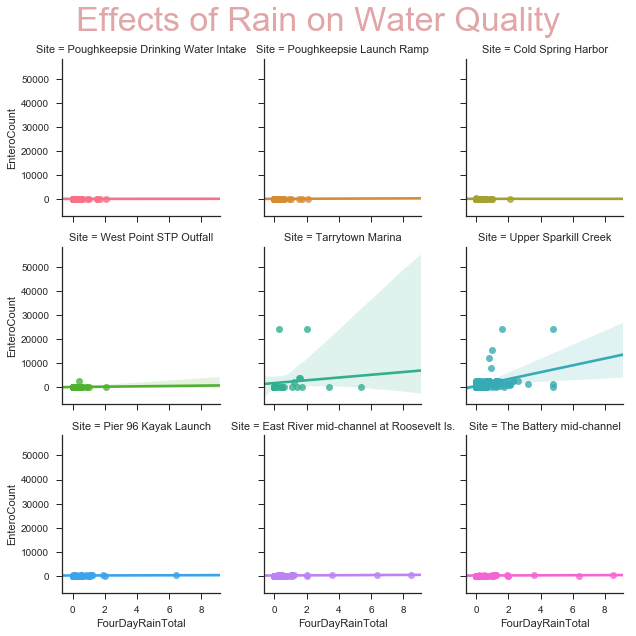

In [61]:
g = sns.lmplot(x="FourDayRainTotal", y="EnteroCount", col="Site", hue="Site", data=rainsub, col_wrap=3, size=3)

# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph 
g.fig.suptitle('Effects of Rain on Water Quality', fontsize=34,color="r",alpha=0.5)


**According to the linear regression plots, we can see there is no correlations between rain and the water quality. We can confirm this conclusion by the linear regression model for each sites as shown as follows.**

In [62]:
from statsmodels.formula.api import ols

for location in rain.Site.unique():
    tempdf = rain[rain.Site == location]
    x = tempdf['EnteroCount']
    y = tempdf['FourDayRainTotal']
    model = ols("y ~ x",tempdf)
    results = model.fit()
    print (results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.617
Date:                Tue, 31 Oct 2017   Prob (F-statistic):            0.00936
Time:                        07:36:50   Log-Likelihood:                -35.716
No. Observations:                  35   AIC:                             75.43
Df Residuals:                      33   BIC:                             78.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5138      0.124      4.131      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     19.40
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           9.54e-05
Time:                        07:36:50   Log-Likelihood:                -32.092
No. Observations:                  37   AIC:                             68.18
Df Residuals:                      35   BIC:                             71.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4169      0.107      3.892      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4914
Date:                Tue, 31 Oct 2017   Prob (F-statistic):              0.488
Time:                        07:36:51   Log-Likelihood:                -26.360
No. Observations:                  37   AIC:                             56.72
Df Residuals:                      35   BIC:                             59.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3357      0.085      3.931      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.1294
Date:                Tue, 31 Oct 2017   Prob (F-statistic):              0.721
Time:                        07:36:51   Log-Likelihood:                -45.087
No. Observations:                  42   AIC:                             94.17
Df Residuals:                      40   BIC:                             97.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4657      0.116      4.026      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.1553
Date:                Tue, 31 Oct 2017   Prob (F-statistic):              0.695
Time:                        07:36:51   Log-Likelihood:                -96.138
No. Observations:                  57   AIC:                             196.3
Df Residuals:                      55   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6332      0.182      3.485      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4772
Date:                Tue, 31 Oct 2017   Prob (F-statistic):              0.493
Time:                        07:36:51   Log-Likelihood:                -87.605
No. Observations:                  47   AIC:                             179.2
Df Residuals:                      45   BIC:                             182.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7689      0.240      3.199      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     45.01
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           2.26e-08
Time:                        07:36:52   Log-Likelihood:                -74.242
No. Observations:                  49   AIC:                             152.5
Df Residuals:                      47   BIC:                             156.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1690      0.191      0.886      0.3

**R-square values are all very small, suggesting that there is no correlation between rain and the water quality.**